In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import datetime
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib.pyplot as plt
# from utils import *
from read_networks import read_combined_graph_from_csv, read_citation_graph_from_edgelist

from experiments import GraphClass, GraphAttributeClass, UpdateGraphClass, ExperimentClass

In [2]:
# read graph
_, g_init, init_date, df = read_combined_graph_from_csv(
    field='History',  # 'History' or 'Physics'
    init_cutoff_date='2019-03-01',
    graph=nx.DiGraph()  # nx.Graph() or nx.DiGraph()
)

In [3]:
out_degree_cent = nx.out_degree_centrality(g_init)
in_degree_cent = nx.in_degree_centrality(g_init)
eigen_cent = nx.eigenvector_centrality_numpy(g_init)
katz_cent = nx.katz_centrality_numpy(g_init)
close_cent = nx.closeness_centrality(g_init)
between_cent = nx.betweenness_centrality(g_init)
harmonic_cent = nx.harmonic_centrality(g_init)

In [4]:
def get_stats(distrib: dict, title: str):
    distrib_ = [v for v in distrib.values()]
    print(sorted(distrib_, reverse=True)[:10])
    plt.hist(distrib_)
    plt.title(title)
    plt.xlabel('Centrality')
    plt.ylabel('Counts')

    print('Max: ' + str(max(distrib_)))
    print('Min: ' + str(min(distrib_)))
    print('Mean: ' + str(np.mean(distrib_)))
    print('Median: ' + str(np.median(distrib_)))
    print('Std. dev.: ' + str(np.std(distrib_)))

[0.0034980323567993005, 0.0026235242675994755, 0.0026235242675994755, 0.0026235242675994755, 0.0026235242675994755, 0.0026235242675994755, 0.0026235242675994755, 0.0026235242675994755, 0.0026235242675994755, 0.0026235242675994755]
Max: 0.0034980323567993005
Min: 0.0
Mean: 2.4270657195886757e-05
Median: 0.0
Std. dev.: 0.00022870510539182306


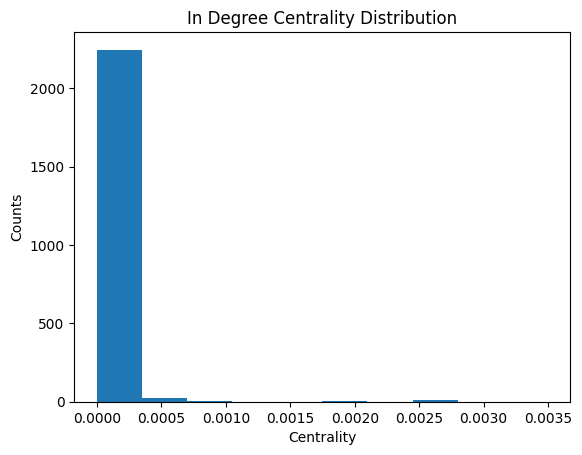

In [5]:
get_stats(in_degree_cent, 'In Degree Centrality Distribution')

[0.005684302579798863, 0.005684302579798863, 0.005684302579798863, 0.005684302579798863, 0.005684302579798863, 0.005684302579798863, 0.0017490161783996502, 0.0013117621337997377, 0.0013117621337997377, 0.0008745080891998251]
Max: 0.005684302579798863
Min: 0.0
Mean: 2.4270657195886754e-05
Median: 0.0
Std. dev.: 0.0003031743241922322


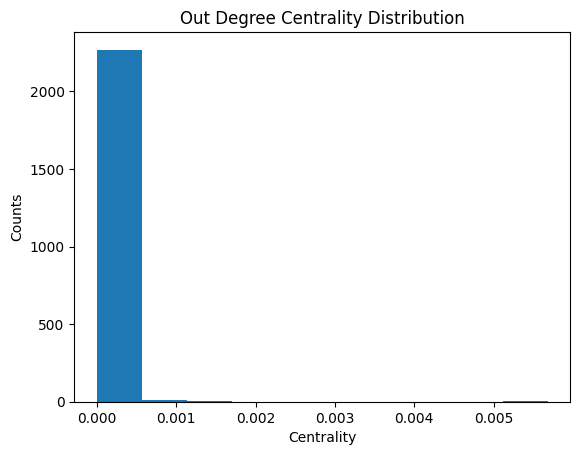

In [6]:
get_stats(out_degree_cent, 'Out Degree Centrality Distribution')

[0.99999999988604, 1.5097026992851645e-05, 4.0498412707861886e-13, 4.036573389488125e-13, 3.99394270801824e-13, 3.9626411290865703e-13, 3.9092178964388744e-13, 3.9083315993463304e-13, 3.8823210382397923e-13, 3.85935411669852e-13]
Max: 0.99999999988604
Min: -2.872032477090156e-13
Mean: 0.0004370695353658034
Median: -7.626741819967959e-17
Std. dev.: 0.020901480983035445


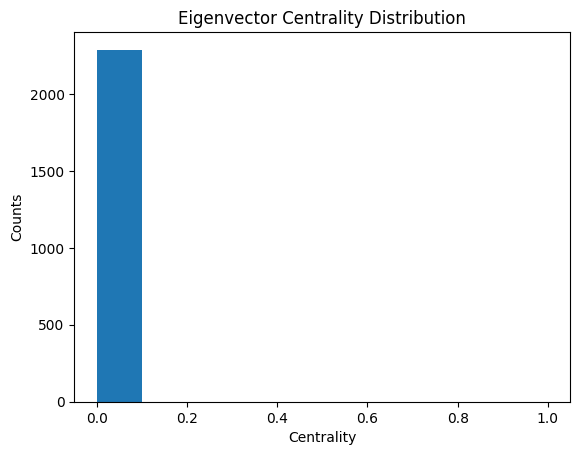

In [7]:
get_stats(eigen_cent, 'Eigenvector Centrality Distribution')

[0.03737160819390299, 0.033219207283469325, 0.033219207283469325, 0.033219207283469325, 0.033219207283469325, 0.033219207283469325, 0.033219207283469325, 0.033219207283469325, 0.033219207283469325, 0.033219207283469325]
Max: 0.03737160819390299
Min: 0.020762004552168322
Mean: 0.02087771098575429
Median: 0.020762004552168322
Std. dev.: 0.0010881732666499914


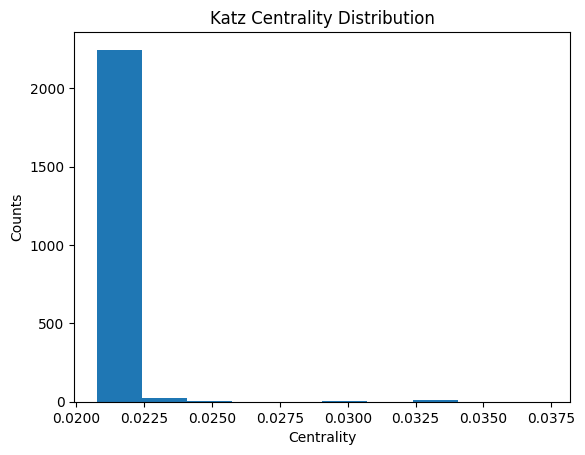

In [8]:
get_stats(katz_cent, 'Katz Centrality Distribution')

[0.0034980323567993005, 0.0026235242675994755, 0.0026235242675994755, 0.0026235242675994755, 0.0026235242675994755, 0.0026235242675994755, 0.0026235242675994755, 0.0026235242675994755, 0.0026235242675994755, 0.0026235242675994755]
Max: 0.0034980323567993005
Min: 0.0
Mean: 2.448565317498418e-05
Median: 0.0
Std. dev.: 0.0002297331780815388


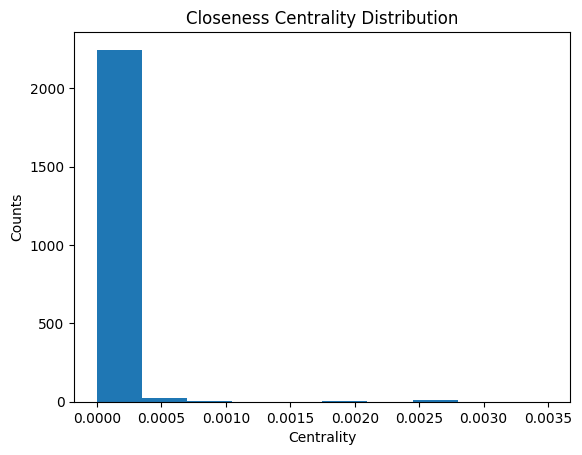

In [9]:
get_stats(close_cent, 'Closeness Centrality Distribution')

[5.738242055116962e-07, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Max: 5.738242055116962e-07
Min: 0.0
Mean: 2.507972926187484e-10
Median: 0.0
Std. dev.: 1.1993775798281909e-08


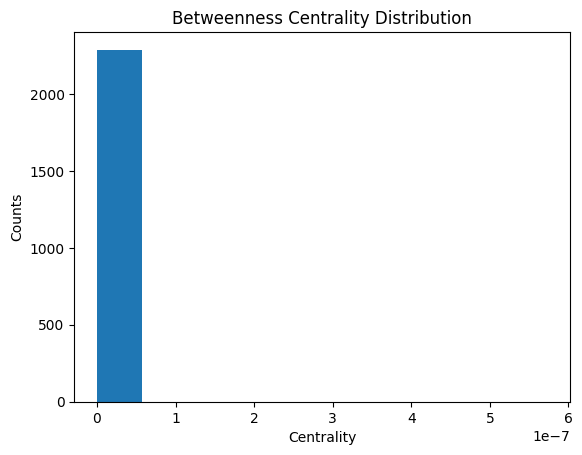

In [10]:
get_stats(between_cent, 'Betweenness Centrality Distribution')

[8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0]
Max: 8.0
Min: 0
Mean: 0.056162587412587416
Median: 0.0
Std. dev.: 0.5264146390125677


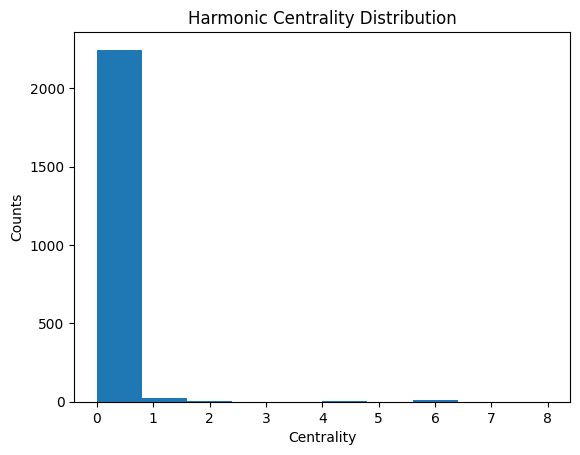

In [11]:
get_stats(harmonic_cent, 'Harmonic Centrality Distribution')

In [28]:
e = 1.1

def normalize(cent):
    max_val = max(cent.values())
    min_val = min(cent.values())

    return {k: ((v - min_val) / ((e * max_val) - min_val)) for k, v in cent.items()}

out_degree_cent_norm = normalize(out_degree_cent)
in_degree_cent_norm = normalize(in_degree_cent)
eigen_cent_norm = normalize(eigen_cent)
katz_cent_norm = normalize(katz_cent)
close_cent_norm = normalize(close_cent)
between_cent_norm = normalize(between_cent)
harmonic_cent_norm = normalize(harmonic_cent)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3076923076923077, 0.23076923076923078, 0.23076923076923078, 0.15384615384615385]
Max: 1.0
Min: 0.0
Mean: 0.004269768692845615
Median: 0.0
Std. dev.: 0.05333535995597193


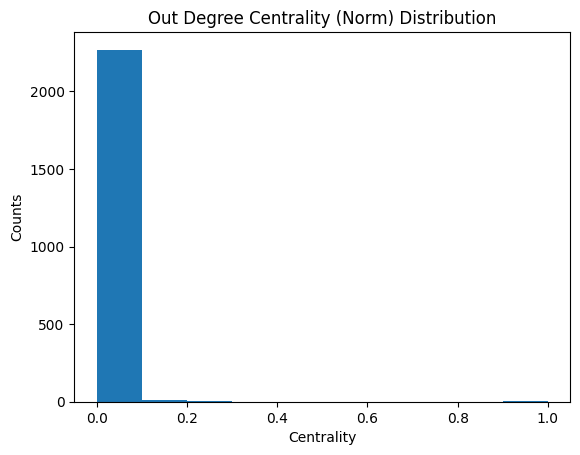

In [13]:
get_stats(out_degree_cent_norm, 'Out Degree Centrality (Norm) Distribution')

[1.0, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]
Max: 1.0
Min: 0.0
Mean: 0.006938374125874126
Median: 0.0
Std. dev.: 0.06538107200388744


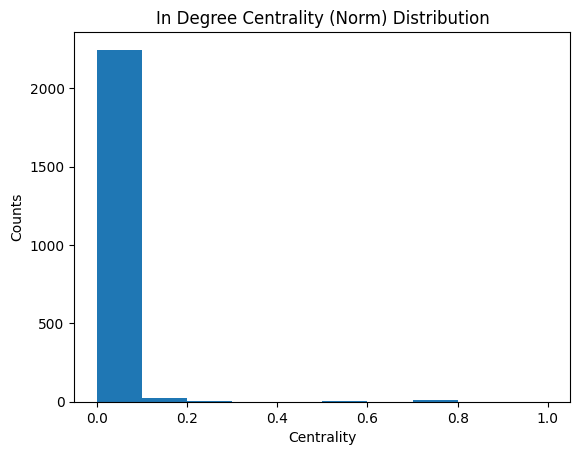

In [14]:
get_stats(in_degree_cent_norm, 'In Degree Centrality (Norm) Distribution')

[1.0, 1.5097027281771014e-05, 6.921873748663173e-13, 6.9086058673636e-13, 6.86597518588887e-13, 6.834673606953641e-13, 6.781250374299873e-13, 6.780364077207228e-13, 6.754353516097734e-13, 6.731386594553851e-13]
Max: 1.0
Min: 0.0
Mean: 0.0004370695357026891
Median: 2.871269803234544e-13
Std. dev.: 0.020901480985411374


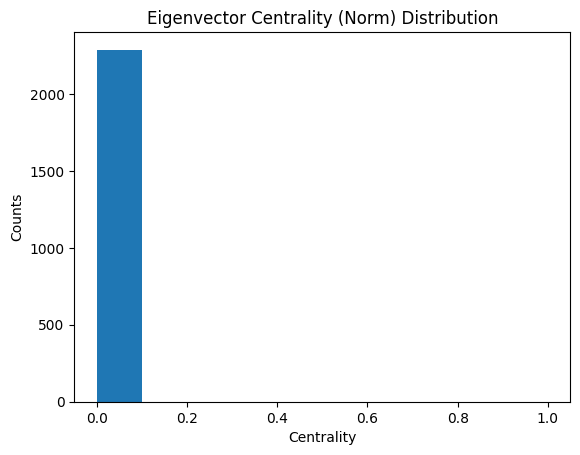

In [15]:
get_stats(eigen_cent_norm, 'Eigenvector Centrality (Norm) Distribution')

[1.0, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]
Max: 1.0
Min: 0.0
Mean: 0.0069662368881118885
Median: 0.0
Std. dev.: 0.06551470403036933


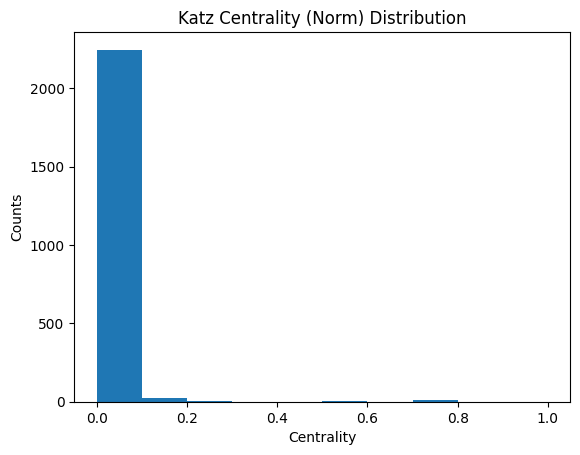

In [16]:
get_stats(katz_cent_norm, 'Katz Centrality (Norm) Distribution')

[1.0, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]
Max: 1.0
Min: 0.0
Mean: 0.006999836101398601
Median: 0.0
Std. dev.: 0.0656749722840599


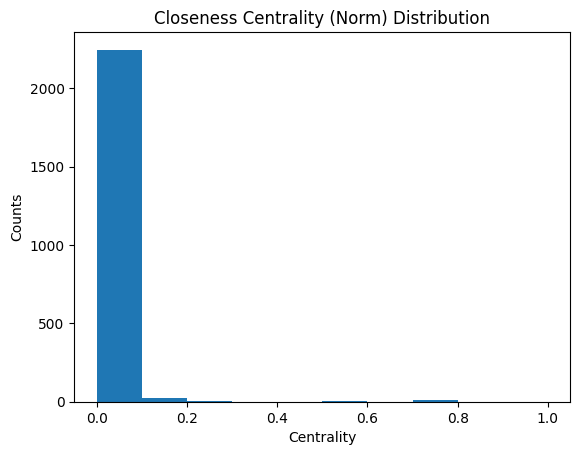

In [17]:
get_stats(close_cent_norm, 'Closeness Centrality (Norm) Distribution')

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Max: 1.0
Min: 0.0
Mean: 0.00043706293706293706
Median: 0.0
Std. dev.: 0.02090148112101109


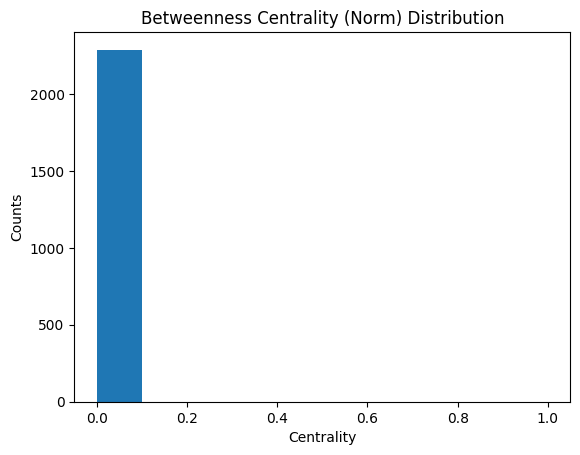

In [18]:
get_stats(between_cent_norm, 'Betweenness Centrality (Norm) Distribution')

[1.0, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]
Max: 1.0
Min: 0.0
Mean: 0.007020323426573427
Median: 0.0
Std. dev.: 0.06580182987657096


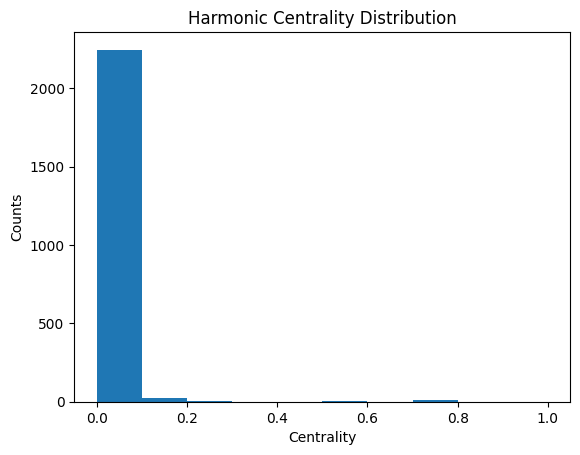

In [19]:
# initialize attributes of the graph to test
get_stats(harmonic_cent_norm, 'Harmonic Centrality Distribution')

In [20]:
def run_simulation(test_graph, title='Average difference in opinion per iterations'):
    models = ['Abebe', 'Friedkin-Johnson', 'New']  # mode = ['Friedkin-Johnson', 'Abebe', 'new']
    fig = go.Figure()

    # simulate
    for model in models:
        # setup
        graph = test_graph.copy()
        test = ExperimentClass(graph, model, df, init_date)

        # Execute the model
        test.run_model(steps=24)

        # get results
        avgdiff_per_iter = test.get_avgdiff_per_iter()
        print(f"avgdiff_per_iter: {avgdiff_per_iter}")
        opinions_std_per_iter = test.get_opinions_std_per_iter()
        print(f"opinions_std_per_iter: {opinions_std_per_iter}")

        # plot the results
        test.plot()
        fig.add_trace(go.Scatter(x=np.arange(1, len(avgdiff_per_iter)+1), y=opinions_std_per_iter, mode='lines', name=f'{model}'))

    # plot multiple models together
    fig.update_layout(title=title, 
                    xaxis_title='step', yaxis_title='Avg Difference in Opinion',
                    title_x=0.5, title_y=0.85,
                    legend=dict(
                        yanchor="top",
                        y=0.99,
                        xanchor="right",
                        x=0.99
                    ),
                    width=600, height=400)

    # update x ticks to every 1
    fig.update_xaxes(dtick=1)
    fig.show()

    # Save the figure with a high resolution (dpi=300)
    # pio.write_image(fig, 'avg_diff.jpeg', width=600, height=400, scale=10)

avgdiff_per_iter: [0.4962710701460734, 0.005130869649177213, 0.001118307023388096, 0.0001903584960844255, 2.8283432804073606e-05, 8.510874954972723e-06, 1.8591698837955253e-06, 3.8870916183589956e-07, 8.494501953651455e-08, 2.007972889877578e-08, 5.143906064433689e-09, 3.0751731786237385e-09, 1.6535962433076276e-09, 5.483656970956617e-10, 1.5775199283699238e-10, 5.916830727888478e-11, 2.54631215899319e-11, 2.1995403707308995e-11, 9.895817284880578e-12, 1.6017652159709827e-11, 1.0058398104707447e-11, 4.9431560785163366e-12, 4.1714950108409795e-12]
opinions_std_per_iter: [0.06152667133014016, 0.03248945208780923, 0.026433335668711377, 0.0261769550923141, 0.0261703283278756, 0.026169729504908, 0.026169768432104022, 0.0261697855674635, 0.026169789737473574, 0.02616979074926227, 0.02616979101062841, 0.026169790997140306, 0.02616979107045853, 0.026169791097575727, 0.026169791105232036, 0.026169791108251628, 0.026169791109417376, 0.026169791109524127, 0.02616979111002917, 0.026169791110028862

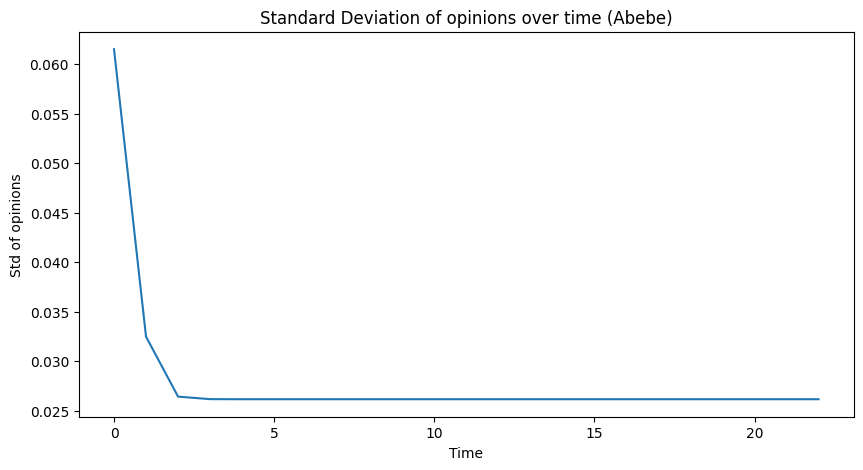

avgdiff_per_iter: [0.04475451536794142, 0.10093193204994241, 0.09331317550776984, 0.09291748193446195, 0.0937230669415303, 0.09978080232292877, 0.09755159157824853, 0.09626372335895331, 0.09902665580031732, 0.09935208679420343, 0.0965872831993715, 0.09380530866009276, 0.09426630115129514, 0.09674107599810822, 0.0918205289316583, 0.09209142404403625, 0.09259406227036279, 0.09307308187944198, 0.0889710426526541, 0.09093384086420073, 0.08788715347044276, 0.08762120262720927, 0.08923945555216209]
opinions_std_per_iter: [0.08971591503514084, 0.08935978593869155, 0.08974757247674751, 0.08954493042708671, 0.08942617572348607, 0.08993147272806297, 0.0901867761270163, 0.08924077588210845, 0.08905525089874623, 0.0888329995410265, 0.08919525745072827, 0.08800773545894362, 0.0898591431031407, 0.08692027431480734, 0.08798185908727081, 0.08857954852971606, 0.08805391892040051, 0.08696552685826392, 0.08614828408657862, 0.08535848822354968, 0.08387637041476884, 0.08206737587363291, 0.08673208428832636

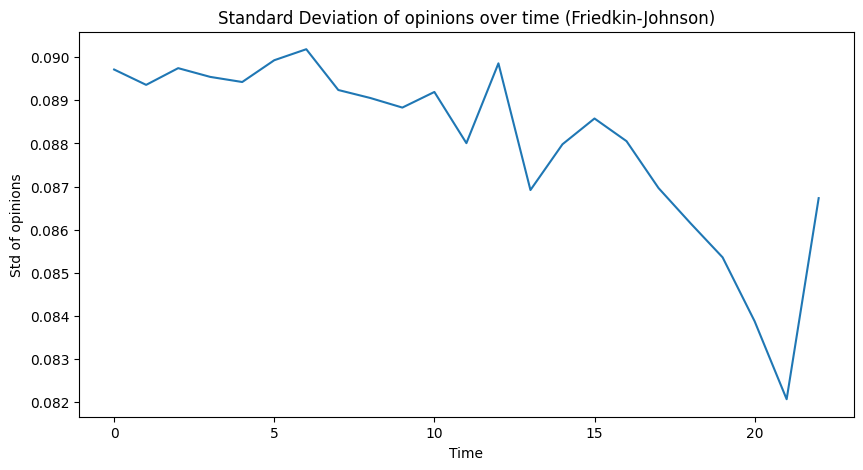

avgdiff_per_iter: [0.4962387867077863, 0.005047153640805424, 0.0012175310130171624, 0.00021244963430246233, 3.242228498962521e-05, 9.480750333866948e-06, 2.04298067302099e-06, 4.194076106800785e-07, 8.982178886708904e-08, 2.0838323369677754e-08, 5.2609066156175214e-09, 3.10699148034353e-09, 1.7259052230628406e-09, 6.092147034654635e-10, 1.9929524395845873e-10, 7.113213607696484e-11, 3.0773572689611935e-11, 4.5162800285681794e-11, 1.326402166257011e-11, 6.347509301858087e-11, 3.916547555030084e-11, 2.1160201934354295e-11, 4.090626942952045e-11]
opinions_std_per_iter: [0.06174047893416913, 0.03352272830234408, 0.026497815309417992, 0.026179095037650764, 0.02617051382478021, 0.026169729215098195, 0.02616976690769998, 0.026169785281755373, 0.02616978969192501, 0.026169790742211707, 0.026169791009543787, 0.02616979099635312, 0.026169791066305317, 0.02616979109476045, 0.026169791101007114, 0.026169791104607956, 0.026169791105188186, 0.026169791104496548, 0.02616979110517346, 0.02616979110331

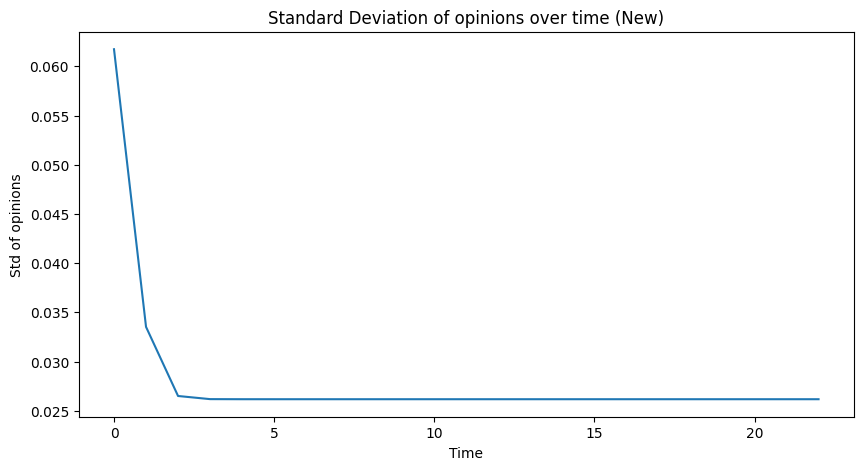

In [21]:
# initialize attributes of the graph to test
g0 = GraphAttributeClass().add_attrs(g=g_init, conformity_node_dict=out_degree_cent_norm)
run_simulation(g0, title='Out Degree Conformity')

avgdiff_per_iter: [0.4937412866552554, 0.0054025938980773085, 0.0025622456940440205, 0.0011082803759590483, 0.0007204972294358327, 0.0006351446259307915, 0.000849911530879538, 0.000865797332312647, 0.0004131951184941926, 0.000274247484730274, 0.0003997158348504184, 0.00045863693113815264, 0.00021685568309406998, 0.00025190254977324676, 0.0003659948720185263, 0.00017103406399119378, 0.00019935247508810923, 0.0002850785686494705, 0.0001436710077497808, 0.00012993009941646632, 0.00021323665626590512, 0.00018814892288256902, 0.00013682487140296472]
opinions_std_per_iter: [0.0663903687647126, 0.04272301648780367, 0.035867531750851264, 0.029693087137519492, 0.025699061529018814, 0.02356972383047822, 0.023904003904653737, 0.024382788064627552, 0.022586354957882533, 0.020509984136848115, 0.019391252378823887, 0.01862413317501731, 0.016929111933247722, 0.01564987059744395, 0.014751920844423862, 0.013410933379106958, 0.012377212868786968, 0.011777517017514146, 0.01070681592415327, 0.009733462282

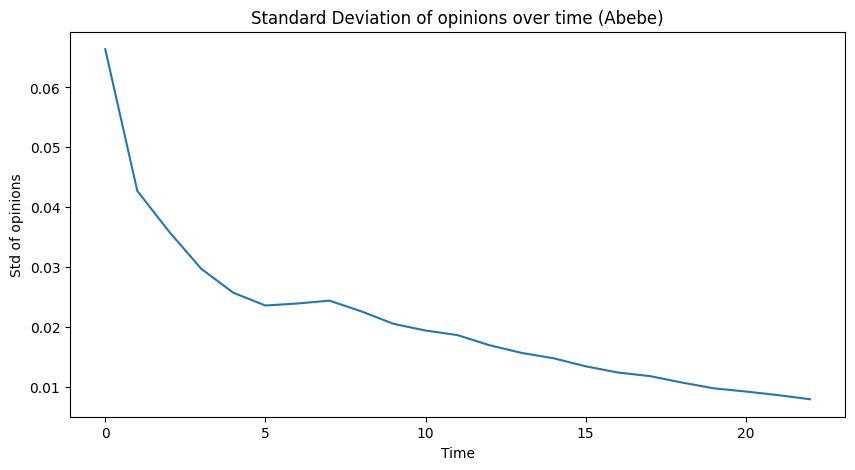

avgdiff_per_iter: [0.04475451536794142, 0.10093193204994241, 0.09331317550776984, 0.09291748193446195, 0.0937230669415303, 0.09978080232292877, 0.09755159157824853, 0.09626372335895331, 0.09902665580031732, 0.09935208679420343, 0.0965872831993715, 0.09380530866009276, 0.09426630115129514, 0.09674107599810822, 0.0918205289316583, 0.09209142404403625, 0.09259406227036279, 0.09307308187944198, 0.0889710426526541, 0.09093384086420073, 0.08788715347044276, 0.08762120262720927, 0.08923945555216209]
opinions_std_per_iter: [0.08971591503514084, 0.08935978593869155, 0.08974757247674751, 0.08954493042708671, 0.08942617572348607, 0.08993147272806297, 0.0901867761270163, 0.08924077588210845, 0.08905525089874623, 0.0888329995410265, 0.08919525745072827, 0.08800773545894362, 0.0898591431031407, 0.08692027431480734, 0.08798185908727081, 0.08857954852971606, 0.08805391892040051, 0.08696552685826392, 0.08614828408657862, 0.08535848822354968, 0.08387637041476884, 0.08206737587363291, 0.08673208428832636

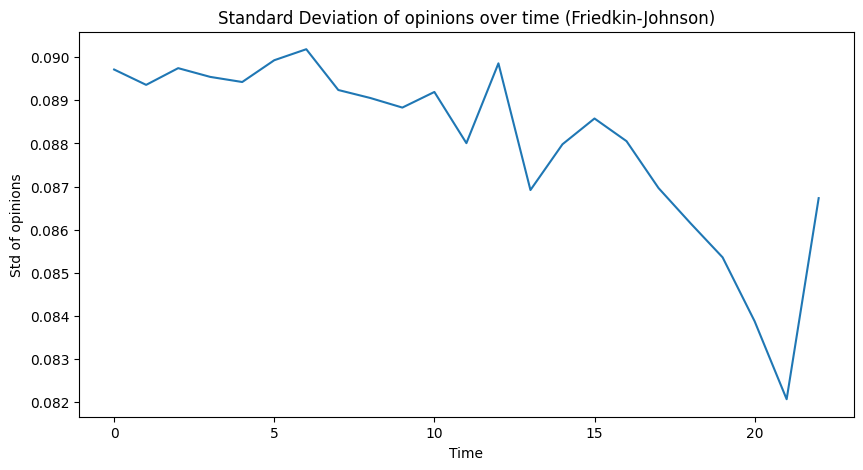

avgdiff_per_iter: [0.4937047857098968, 0.00524239991949675, 0.0025975049419524813, 0.0011584839676380616, 0.000746708671394176, 0.0006601174980063503, 0.0008648584936003086, 0.0008774735285428035, 0.0004229879986518306, 0.00028296988253864345, 0.00040799609975755854, 0.0005124000773339691, 0.00023077088139176395, 0.00026061377718898096, 0.00035491141951005334, 0.0001804196887587502, 0.00020808308269273343, 0.0003502933066603926, 0.00015671022149261367, 0.00014305012486153136, 0.00024383151364674917, 0.00020934283194049032, 0.00014929668780177546]
opinions_std_per_iter: [0.0666056559923757, 0.04399759893995653, 0.036940329933837265, 0.030491130984704448, 0.02639354003081165, 0.02416132735483686, 0.024420942790396218, 0.02484304214707251, 0.023003754597678398, 0.020889520372936496, 0.019731281661848524, 0.019141073883831364, 0.017382933027424347, 0.01606010925029082, 0.015221764247643292, 0.01383808687418178, 0.012758307582023648, 0.012363814941985603, 0.011239786234450025, 0.01021290162

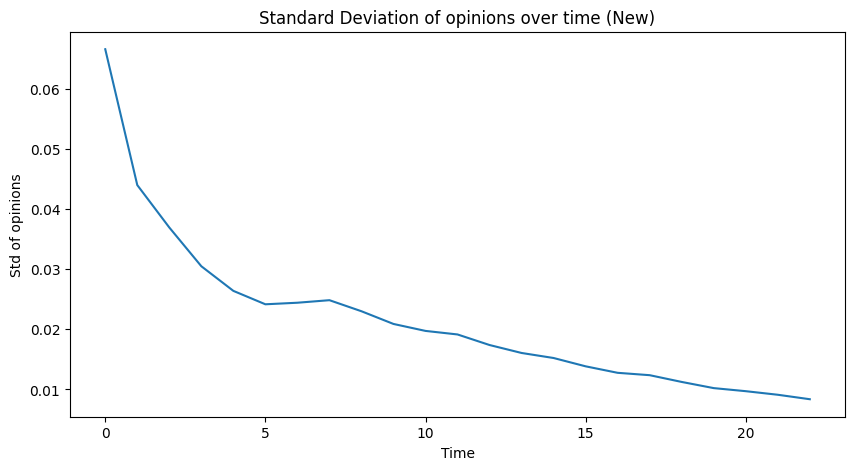

In [29]:
# initialize attributes of the graph to test
g1 = GraphAttributeClass().add_attrs(g=g_init, conformity_node_dict=in_degree_cent_norm)
run_simulation(g1, title='In Degree Conformity')

avgdiff_per_iter: [0.4963329218529408, 0.006681190909957722, 1.7391793620203632e-05, 8.929641335805092e-14, 1.489637542148854e-05, 4.318612289844359e-18, 2.2383872492600505e-41, 2.2332671524172683e-41, 4.852373359375684e-20, 4.852373359375684e-20, 2.2102029598518866e-41, 0.000539645851222358, 0.00023949539204413776, 4.956340768785891e-05, 7.212618012782942e-05, 3.895667638209083e-05, 5.981663318704473e-05, 0.0003528941046221569, 2.265657972235536e-05, 0.0005932583961060141, 0.000429342356241032, 0.00020157604105813302, 0.0001808804831898168]
opinions_std_per_iter: [0.061901456878446566, 0.02621864824952033, 0.025859249109348288, 0.025859249107558883, 0.025546103607237733, 0.025546103607237643, 0.025546103607237643, 0.025546103607237643, 0.025546103607237643, 0.025546103607237643, 0.025546103607237643, 0.029547317243736906, 0.02641979236987515, 0.025655731843025675, 0.024505112214557034, 0.02389694955574294, 0.023471718640660912, 0.025672315321985884, 0.025363459738971677, 0.02663053554

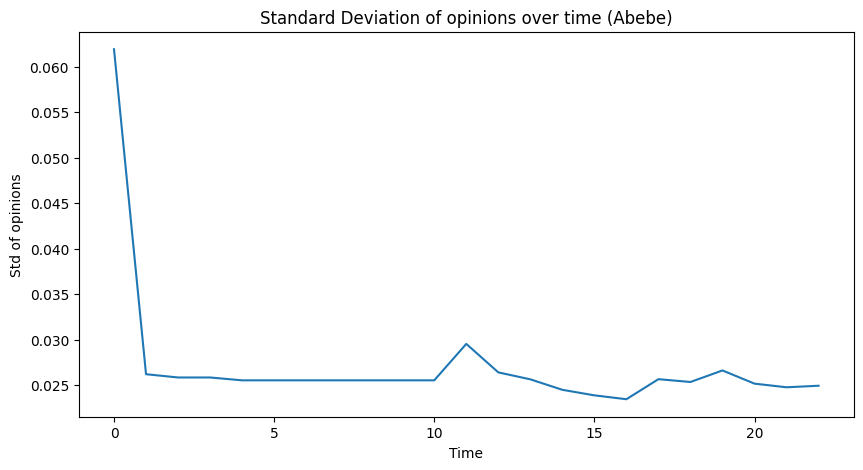

avgdiff_per_iter: [0.04475451536794142, 0.10093193204994241, 0.09331317550776984, 0.09291748193446195, 0.0937230669415303, 0.09978080232292877, 0.09755159157824853, 0.09626372335895331, 0.09902665580031732, 0.09935208679420343, 0.0965872831993715, 0.09380530866009276, 0.09426630115129514, 0.09674107599810822, 0.0918205289316583, 0.09209142404403625, 0.09259406227036279, 0.09307308187944198, 0.0889710426526541, 0.09093384086420073, 0.08788715347044276, 0.08762120262720927, 0.08923945555216209]
opinions_std_per_iter: [0.08971591503514084, 0.08935978593869155, 0.08974757247674751, 0.08954493042708671, 0.08942617572348607, 0.08993147272806297, 0.0901867761270163, 0.08924077588210845, 0.08905525089874623, 0.0888329995410265, 0.08919525745072827, 0.08800773545894362, 0.0898591431031407, 0.08692027431480734, 0.08798185908727081, 0.08857954852971606, 0.08805391892040051, 0.08696552685826392, 0.08614828408657862, 0.08535848822354968, 0.08387637041476884, 0.08206737587363291, 0.08673208428832636

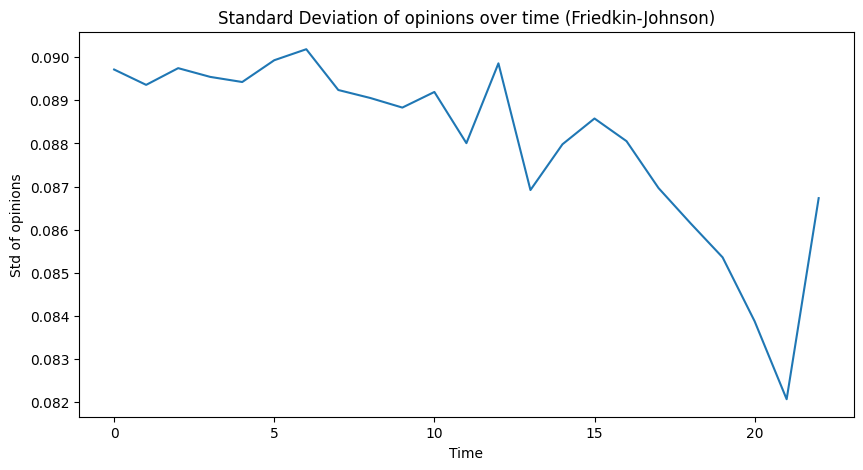

avgdiff_per_iter: [0.49629640819634274, 0.006643903033613937, 8.430052297696885e-06, 1.0640442004573512e-13, 1.4041255072255653e-05, 7.835469172344268e-08, 4.852373359375684e-20, 2.3440056600045896e-41, 2.3423179451689794e-41, 2.341266029330271e-41, 2.304953818877971e-05, 0.0005917342278613703, 0.0003848459122302953, 0.00013483291810125354, 0.00011398316600490973, 3.614913805156771e-05, 0.00018123461082881578, 0.00041539449312903915, 5.413959687089107e-05, 0.000820223469335266, 0.0005556059806344964, 0.00038257576065989484, 0.0006768601051389469]
opinions_std_per_iter: [0.062136006334847116, 0.026850847854876153, 0.026677756194539652, 0.02667775619238642, 0.026389794957803765, 0.026388217618448603, 0.026388217618448603, 0.0263882176184486, 0.0263882176184486, 0.0263882176184486, 0.02616140117171825, 0.030700322626291323, 0.028137977427005308, 0.028390943317084586, 0.026630599066764755, 0.026212675963565864, 0.025814033735322102, 0.02793592164594603, 0.027224114642627528, 0.029952713791

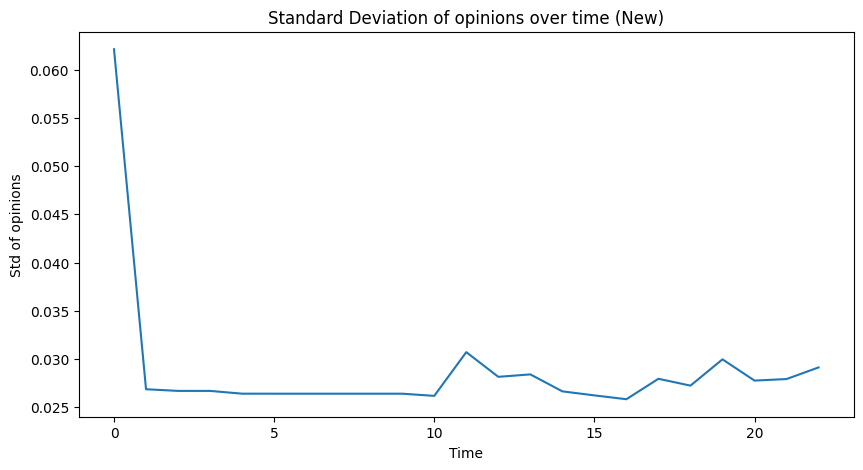

In [23]:
# initialize attributes of the graph to test
g2 = GraphAttributeClass().add_attrs(g=g_init, conformity_node_dict=eigen_cent_norm)
run_simulation(g2, title='Eigen Degree Conformity')

avgdiff_per_iter: [0.49344502179044863, 0.005055952139398071, 0.0024658097261750006, 0.0009206869390786582, 0.0006018240808269601, 0.0006207208692065597, 0.0011207217701240538, 0.0012440376125630562, 0.000355829279719459, 0.00010814143906264313, 0.0005070305208445776, 0.000742669621601828, 5.1525549790480014e-05, 0.00024382398891471647, 0.0007462285276048506, 2.022046646367059e-05, 0.00022342528830389041, 0.0007078720672864522, 1.587902015037285e-05, 1.2121927673376484e-05, 0.0006524616957195558, 0.0005340930695044402, 0.0002129948180210909]
opinions_std_per_iter: [0.06756996053812563, 0.04732609569581158, 0.04391382842519246, 0.040024301143652824, 0.0380207395873765, 0.03827989234151184, 0.042595299307889, 0.047716080008992454, 0.048602816102267965, 0.0485432157898227, 0.05046763692328906, 0.05329764022585985, 0.05329096731134205, 0.05418469308408821, 0.05617157389302279, 0.05617193782474068, 0.057021769920419026, 0.059499947670215554, 0.059499872687803074, 0.05949993512022226, 0.0618

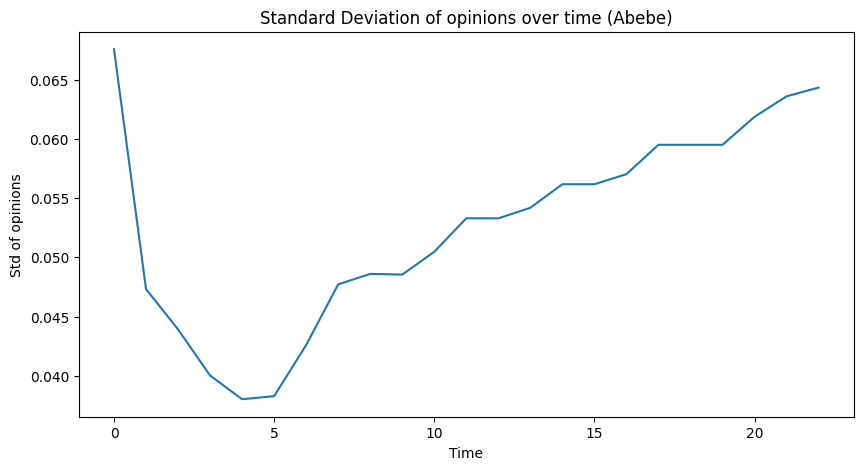

avgdiff_per_iter: [0.04475451536794142, 0.10093193204994241, 0.09331317550776984, 0.09291748193446195, 0.0937230669415303, 0.09978080232292877, 0.09755159157824853, 0.09626372335895331, 0.09902665580031732, 0.09935208679420343, 0.0965872831993715, 0.09380530866009276, 0.09426630115129514, 0.09674107599810822, 0.0918205289316583, 0.09209142404403625, 0.09259406227036279, 0.09307308187944198, 0.0889710426526541, 0.09093384086420073, 0.08788715347044276, 0.08762120262720927, 0.08923945555216209]
opinions_std_per_iter: [0.08971591503514084, 0.08935978593869155, 0.08974757247674751, 0.08954493042708671, 0.08942617572348607, 0.08993147272806297, 0.0901867761270163, 0.08924077588210845, 0.08905525089874623, 0.0888329995410265, 0.08919525745072827, 0.08800773545894362, 0.0898591431031407, 0.08692027431480734, 0.08798185908727081, 0.08857954852971606, 0.08805391892040051, 0.08696552685826392, 0.08614828408657862, 0.08535848822354968, 0.08387637041476884, 0.08206737587363291, 0.08673208428832636

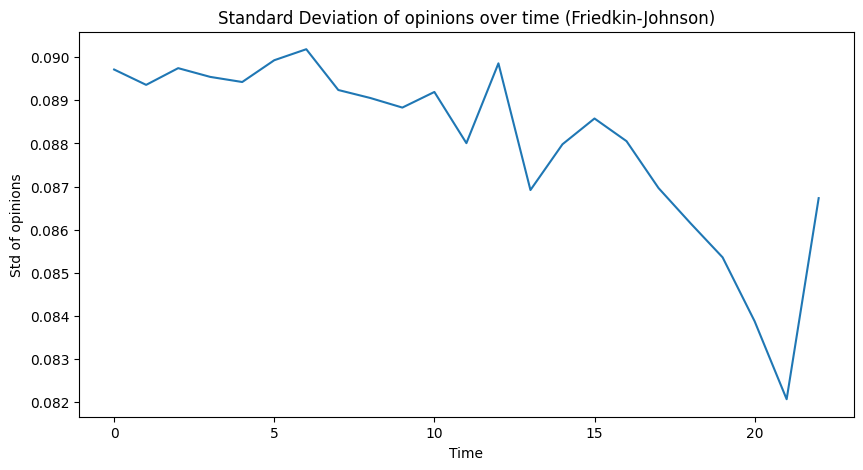

avgdiff_per_iter: [0.4934085245901143, 0.004894801053358736, 0.0024911383420374955, 0.0009559876629038305, 0.0006179871960524888, 0.0006476383497101962, 0.001149110415172131, 0.0012683173010589479, 0.00036370933792632466, 0.00011105860160304465, 0.0005199761527871583, 0.0008951339365665475, 6.253152084488616e-05, 0.000248668336344743, 0.0006905737373452047, 1.99354682932694e-05, 0.00022957174636058158, 0.001024287229306457, 1.7099572465606962e-05, 1.99843753597296e-05, 0.0008175710480497403, 0.0006132882116462848, 0.00022694136819336467]
opinions_std_per_iter: [0.06778111568943, 0.04855635890263537, 0.045128900007080135, 0.04106102460545478, 0.03901944662050501, 0.03922462618428585, 0.04350608430417494, 0.048609265173184465, 0.049494064602459004, 0.04943473018041415, 0.051346526192155434, 0.05476802730908196, 0.05471094273389448, 0.05559682752158125, 0.05795103611044675, 0.057951527561094236, 0.05876841914225874, 0.06246427452597212, 0.062464091612379334, 0.06243324867745652, 0.0652410

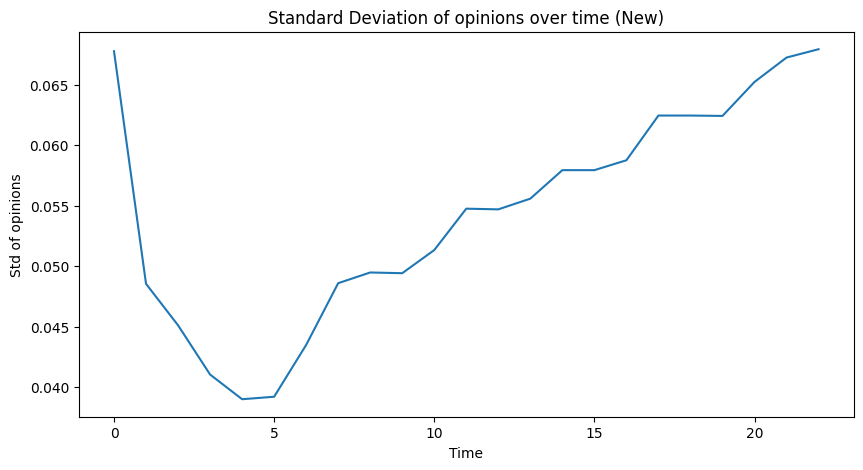

In [24]:
# initialize attributes of the graph to test
g3 = GraphAttributeClass().add_attrs(g=g_init, conformity_node_dict=katz_cent_norm)
run_simulation(g3, title='Katz Centrality Conformity')

avgdiff_per_iter: [0.49342310610659934, 0.0050437287445514204, 0.0024519193370304334, 0.0009265346521307179, 0.000613987348192054, 0.0006320282398074601, 0.001128662067685691, 0.0012489353376232012, 0.0003586226998394755, 0.00010965293209102411, 0.000507817724066722, 0.000743250544815239, 5.166385506032965e-05, 0.00024396396250684732, 0.0007463420206101205, 2.0303019539040838e-05, 0.00022350323237591192, 0.0007080059771453041, 1.593929391599633e-05, 1.2256160787367098e-05, 0.0006525580046855112, 0.0005341352893546829, 0.0002130361548813208]
opinions_std_per_iter: [0.06762935942801923, 0.04749715766264114, 0.04417017706921797, 0.04018448799275749, 0.03809040522865289, 0.03830300539803383, 0.0426011228251807, 0.047717207460865274, 0.04860295089765304, 0.04854316977028195, 0.05046758042551138, 0.05329757556638129, 0.053290903672553507, 0.054184640184545614, 0.05617152934286799, 0.05617190187690376, 0.05702173942620556, 0.05949991231811325, 0.05949984460276605, 0.05949990571618138, 0.06185

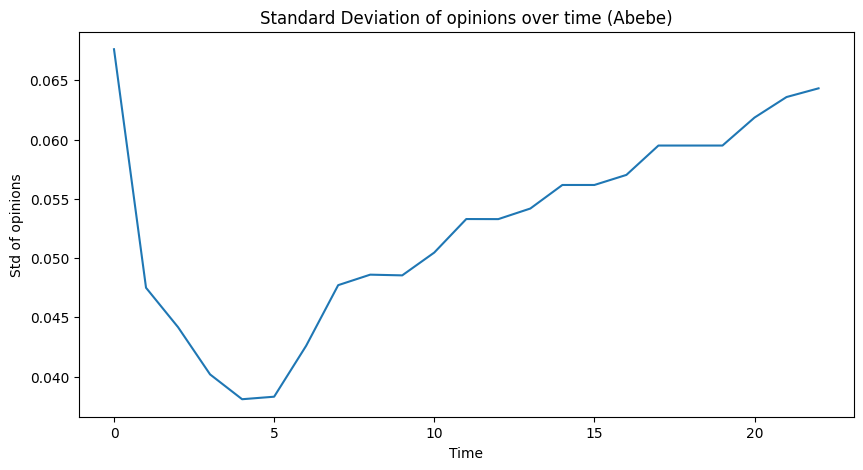

avgdiff_per_iter: [0.04475451536794142, 0.10093193204994241, 0.09331317550776984, 0.09291748193446195, 0.0937230669415303, 0.09978080232292877, 0.09755159157824853, 0.09626372335895331, 0.09902665580031732, 0.09935208679420343, 0.0965872831993715, 0.09380530866009276, 0.09426630115129514, 0.09674107599810822, 0.0918205289316583, 0.09209142404403625, 0.09259406227036279, 0.09307308187944198, 0.0889710426526541, 0.09093384086420073, 0.08788715347044276, 0.08762120262720927, 0.08923945555216209]
opinions_std_per_iter: [0.08971591503514084, 0.08935978593869155, 0.08974757247674751, 0.08954493042708671, 0.08942617572348607, 0.08993147272806297, 0.0901867761270163, 0.08924077588210845, 0.08905525089874623, 0.0888329995410265, 0.08919525745072827, 0.08800773545894362, 0.0898591431031407, 0.08692027431480734, 0.08798185908727081, 0.08857954852971606, 0.08805391892040051, 0.08696552685826392, 0.08614828408657862, 0.08535848822354968, 0.08387637041476884, 0.08206737587363291, 0.08673208428832636

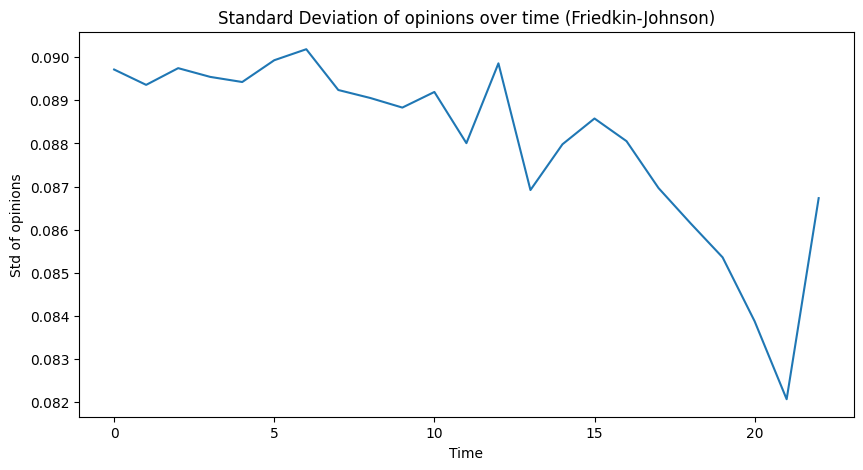

avgdiff_per_iter: [0.49338660643266347, 0.004887082306716827, 0.0024712459153626975, 0.000959111939371227, 0.0006300928880511091, 0.0006597786654983069, 0.001158211028621363, 0.0012741404651235686, 0.00036710861293020805, 0.00011292725137351885, 0.0005209794574984992, 0.0008958214647522373, 6.285594633447466e-05, 0.0002488172993961417, 0.000690652899488275, 2.000136527668284e-05, 0.00022970749384256008, 0.0010245429914006485, 1.716910655124763e-05, 2.041978795168386e-05, 0.0008178724746642519, 0.0006134626877639012, 0.0002272580477415017]
opinions_std_per_iter: [0.06784033332337382, 0.0486965115132921, 0.04540671224848933, 0.041246648970095355, 0.03910899472545442, 0.039255948047903465, 0.043514354865446955, 0.04861098166426407, 0.04949432064939154, 0.04943469446405074, 0.051346460664429175, 0.05476794796299095, 0.054710845822841275, 0.05559673755395574, 0.05795094733314458, 0.057951444897991256, 0.05876833349385852, 0.06246416459131127, 0.06246398919073836, 0.06243311308260515, 0.0652

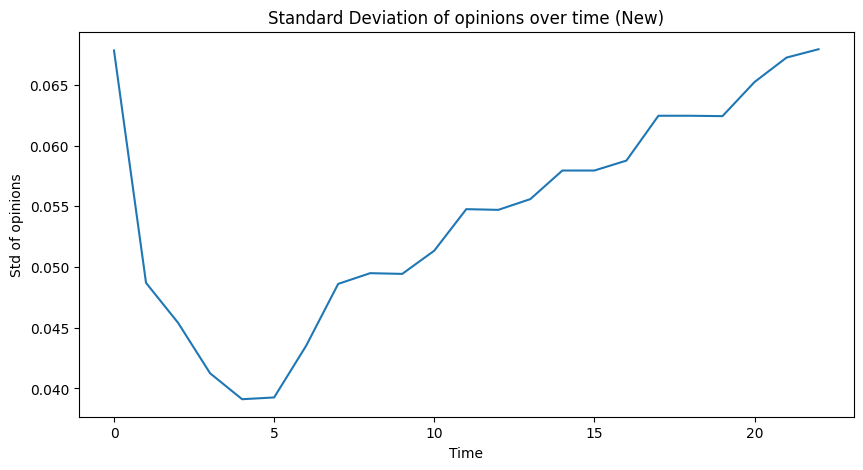

In [25]:
# initialize attributes of the graph to test
g4 = GraphAttributeClass().add_attrs(g=g_init, conformity_node_dict=close_cent_norm)
run_simulation(g4, title='Closeness Conformity')

avgdiff_per_iter: [0.49657779329877033, 0.006794754267551292, 1.738587982687298e-05, 0.0, 8.812882186386163e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00047182906588363123, 4.316991855986791e-05, 0.0, 0.0, 0.0, 4.254640758614706e-05, 0.00039037573797488394, 0.0, 0.0007469161438464019, 0.0005699093441279405, 0.00017154297168789337, 0.00022611421301153115]
opinions_std_per_iter: [0.06081468637925437, 0.02131078993373517, 0.02086619525142723, 0.020866195251427227, 0.018833551517246763, 0.018833551517246763, 0.018833551517246763, 0.018833551517246763, 0.018833551517246767, 0.018833551517246767, 0.018833551517246763, 0.024672385996832663, 0.024756387815331907, 0.02475638781533191, 0.02475638781533191, 0.024756387815331907, 0.024837603177080822, 0.02810868948202904, 0.028108689482029037, 0.029115014899555147, 0.02618094136540059, 0.02633411879153715, 0.026659657714182026]


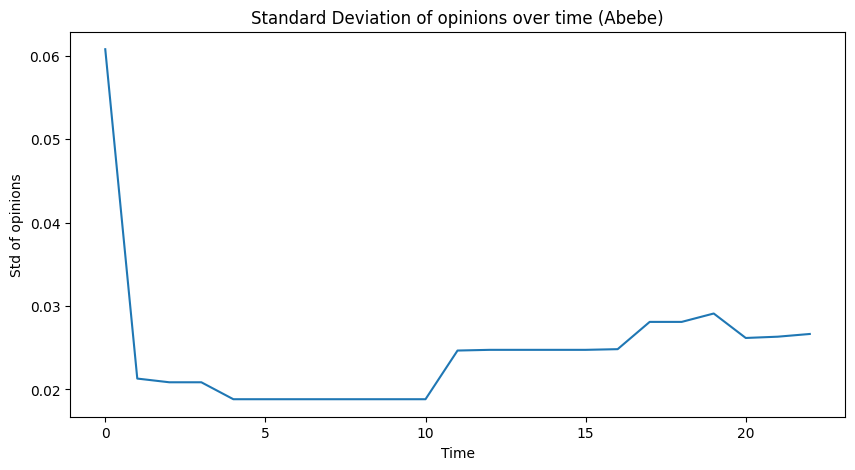

avgdiff_per_iter: [0.04475451536794142, 0.10093193204994241, 0.09331317550776984, 0.09291748193446195, 0.0937230669415303, 0.09978080232292877, 0.09755159157824853, 0.09626372335895331, 0.09902665580031732, 0.09935208679420343, 0.0965872831993715, 0.09380530866009276, 0.09426630115129514, 0.09674107599810822, 0.0918205289316583, 0.09209142404403625, 0.09259406227036279, 0.09307308187944198, 0.0889710426526541, 0.09093384086420073, 0.08788715347044276, 0.08762120262720927, 0.08923945555216209]
opinions_std_per_iter: [0.08971591503514084, 0.08935978593869155, 0.08974757247674751, 0.08954493042708671, 0.08942617572348607, 0.08993147272806297, 0.0901867761270163, 0.08924077588210845, 0.08905525089874623, 0.0888329995410265, 0.08919525745072827, 0.08800773545894362, 0.0898591431031407, 0.08692027431480734, 0.08798185908727081, 0.08857954852971606, 0.08805391892040051, 0.08696552685826392, 0.08614828408657862, 0.08535848822354968, 0.08387637041476884, 0.08206737587363291, 0.08673208428832636

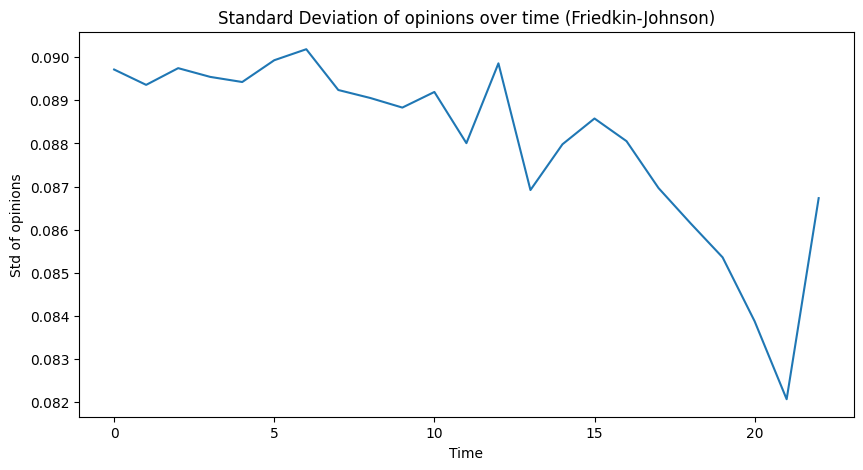

avgdiff_per_iter: [0.4965414775273149, 0.006707029885481825, 8.4230047581942e-06, 0.0, 4.786041730445694e-05, 7.841743581643502e-08, 0.0, 0.0, 0.0, 0.0, 2.3067995570576884e-05, 0.000571091314584603, 0.0001567248215104468, 6.296341100902105e-06, 2.6608111139579507e-08, 2.426186679687842e-20, 0.0001512563126245911, 0.00047811205646969523, 3.185266409398721e-07, 0.0011150576531980321, 0.0007496478535782707, 0.00039893424301622686, 0.0009081440998762681]
opinions_std_per_iter: [0.061051824014774096, 0.022869556823954754, 0.022665980416965156, 0.022665980416965152, 0.02156549949605497, 0.021563846227471147, 0.021563846227471147, 0.021563846227471147, 0.02156384622747115, 0.02156384622747115, 0.0212848640728614, 0.027993824474938325, 0.02910343283343345, 0.029171363806921653, 0.029171654550855776, 0.029171654550855776, 0.03000255928445381, 0.03395913487835157, 0.0339636613912787, 0.038951369106600714, 0.03610533264438132, 0.03769604315109374, 0.04080207474998671]


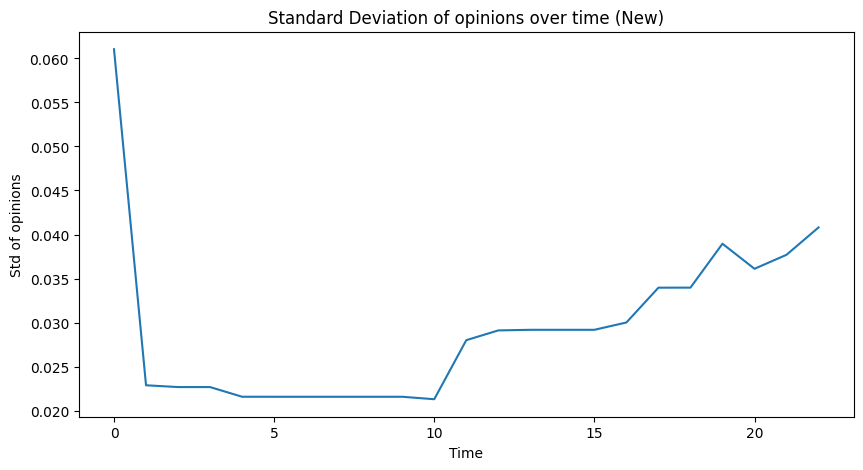

In [26]:
# initialize attributes of the graph to test
g5 = GraphAttributeClass().add_attrs(g=g_init, conformity_node_dict=between_cent_norm)
run_simulation(g5, title='Betweenness Conformity')

[(2234036741, 1.0), (2829608272, 0.75), (2496071035, 0.75), (2071652173, 0.75), (2623793199, 0.75), (2920630441, 0.75), (3113683285, 0.75), (2165346022, 0.75), (2161709033, 0.75), (2672283678, 0.75), (2919231944, 0.75), (2629122980, 0.75), (2889080127, 0.75), (2127191820, 0.75), (2557575132, 0.75), (3026652359, 0.5), (2166969495, 0.5), (348580998, 0.4375), (3033492968, 0.25), (2460037565, 0.25), (1990689506, 0.125), (2805498807, 0.125), (2784011640, 0.125), (2616198612, 0.125), (2567816819, 0.125), (2257094500, 0.125), (2025113514, 0.125), (2982619595, 0.125), (2476280488, 0.125), (3174714801, 0.125), (2215972311, 0.125), (3173650645, 0.125), (2018316615, 0.125), (2137968971, 0.125), (2235281750, 0.125), (2649625082, 0.125), (2557490024, 0.125), (2674906996, 0.125), (2825395069, 0.125), (2980445614, 0.125), (2024152546, 0.125), (2089943040, 0.0), (3145777158, 0.0), (2946949133, 0.0), (2597994511, 0.0), (2156699664, 0.0), (2655453204, 0.0), (2967543832, 0.0), (2476818457, 0.0), (1801453

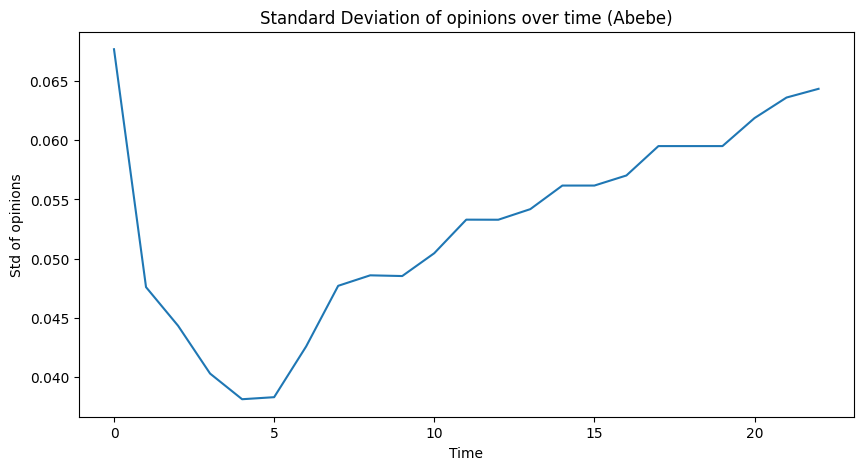

avgdiff_per_iter: [0.04475451536794142, 0.10093193204994241, 0.09331317550776984, 0.09291748193446195, 0.0937230669415303, 0.09978080232292877, 0.09755159157824853, 0.09626372335895331, 0.09902665580031732, 0.09935208679420343, 0.0965872831993715, 0.09380530866009276, 0.09426630115129514, 0.09674107599810822, 0.0918205289316583, 0.09209142404403625, 0.09259406227036279, 0.09307308187944198, 0.0889710426526541, 0.09093384086420073, 0.08788715347044276, 0.08762120262720927, 0.08923945555216209]
opinions_std_per_iter: [0.08971591503514084, 0.08935978593869155, 0.08974757247674751, 0.08954493042708671, 0.08942617572348607, 0.08993147272806297, 0.0901867761270163, 0.08924077588210845, 0.08905525089874623, 0.0888329995410265, 0.08919525745072827, 0.08800773545894362, 0.0898591431031407, 0.08692027431480734, 0.08798185908727081, 0.08857954852971606, 0.08805391892040051, 0.08696552685826392, 0.08614828408657862, 0.08535848822354968, 0.08387637041476884, 0.08206737587363291, 0.08673208428832636

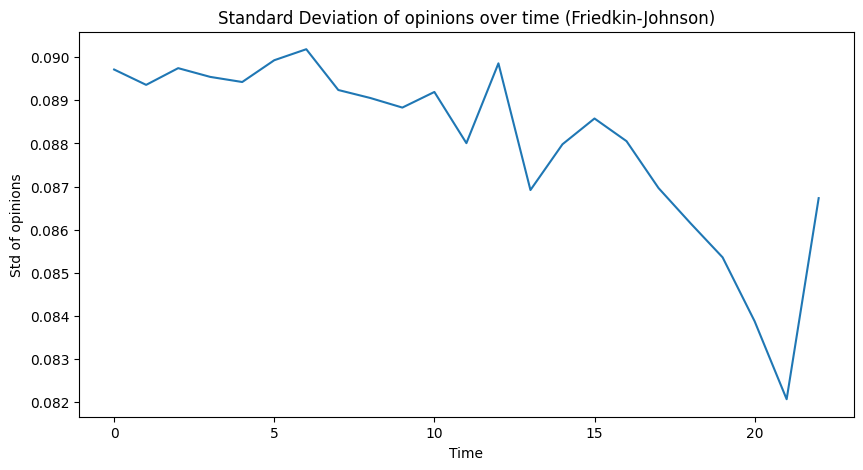

avgdiff_per_iter: [0.49337510960897296, 0.004880343282216476, 0.0024555717657698535, 0.0009571691333296895, 0.0006366504294649347, 0.000667755411034341, 0.0011653844238451465, 0.0012794664102041852, 0.00037066748714980154, 0.00011515139555534585, 0.0005223404001723208, 0.0008969311669977821, 6.330562416276535e-05, 0.00024901199546664736, 0.0006907909701347677, 2.0118038484517774e-05, 0.00022995002159167802, 0.0010250148999059268, 1.7291611700075928e-05, 2.123761818573396e-05, 0.0008184382611527047, 0.0006137863283861208, 0.00022786010686996638]
opinions_std_per_iter: [0.0678778539095117, 0.04878853285418541, 0.04560390336027025, 0.041401411836382664, 0.03919345412855829, 0.03929058155175095, 0.04352512646294614, 0.04861369860239962, 0.04949488535834496, 0.04943470838459084, 0.05134636622402987, 0.054767806269731385, 0.054710685522779294, 0.05559658329571849, 0.057950792223131584, 0.05795129918542192, 0.05876818032781392, 0.06246396553709674, 0.06246380219667196, 0.062432863861323545, 0

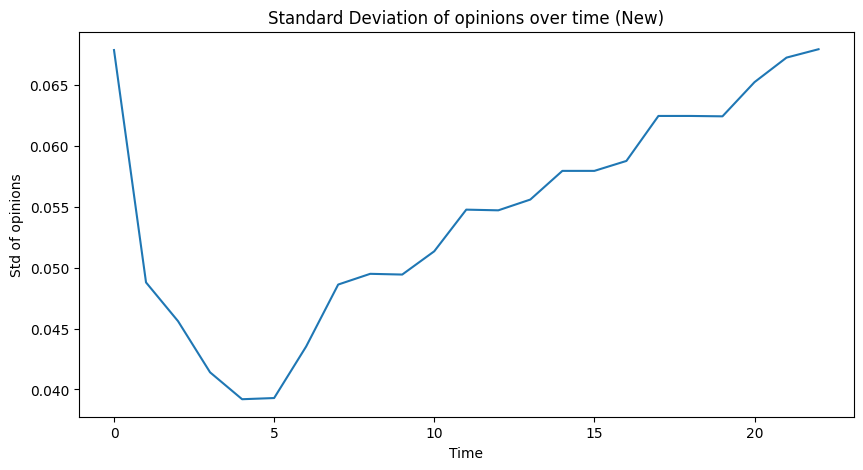

In [27]:
from collections import Counter

# initialize attributes of the graph to test
# test = sorted(harmonic_cent_norm, reverse=True)
test = Counter(harmonic_cent_norm).most_common()
print(test)

g6 = GraphAttributeClass().add_attrs(g=g_init, conformity_node_dict=harmonic_cent_norm)
run_simulation(g6, title='Harmonic Conformity')